In [16]:
using LinearAlgebra

A = [
	[1 2 3]
	[4 5 6]
	[7 8 9]
]
println("Determinant: ",det(A))
println("Trace: ",tr(A))
println("Inverse: ")
inv(A)

Determinant: 0.0
Trace: 15
Inverse: 


LoadError: SingularException(3)

In [17]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")

   Resolving package versions...
   Installed PooledArrays ──────────────── v1.4.3
   Installed SentinelArrays ────────────── v1.4.5
   Installed Crayons ───────────────────── v4.1.1
   Installed TableTraits ───────────────── v1.0.1
   Installed DataAPI ───────────────────── v1.16.0
   Installed InlineStrings ─────────────── v1.4.2
   Installed Tables ────────────────────── v1.12.0
   Installed DataValueInterfaces ───────── v1.0.0
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed PrettyTables ──────────────── v2.3.2
   Installed Reexport ──────────────────── v1.2.2
   Installed InvertedIndices ───────────── v1.3.0
   Installed LaTeXStrings ──────────────── v1.3.1
   Installed OrderedCollections ────────── v1.6.3
   Installed DataFrames ────────────────── v1.6.1
   Installed Compat ────────────────────── v4.16.0
   Installed DataStructures ────────────── v0.18.20
   Installed StringManipulation ────────── v0.3.4
   Installed SortingAlgorithms ─────────── v1.2.1
   Installed

In [18]:
using DataFrames, CSV

In [19]:
df = DataFrame(name=["Julia", "Robert", "Bob","Mary"], age=[12,15,45,32])

Row,name,age
,String,Int64
1,Julia,12
2,Robert,15
3,Bob,45
4,Mary,32


In [20]:
df

Row,name,age
,String,Int64
1,Julia,12
2,Robert,15
3,Bob,45
4,Mary,32


In [21]:
df[<rows>,<columns>]

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://C:/Users/maxim/In[21]#1:4\[90mIn[21]:1:4[0;0m]8;;\
df[[48;2;120;70;70m<[0;0mrows>,<columns>]
[90m#  ╙ ── [0;0m[91mnot a unary operator[0;0m

In [22]:
subs = df[1:3,"age"]

3-element Vector{Int64}:
 12
 15
 45

In [23]:
subs = df[1:3,:]

Row,name,age
,String,Int64
1,Julia,12
2,Robert,15
3,Bob,45


In [24]:
names = df.name

4-element Vector{String}:
 "Julia"
 "Robert"
 "Bob"
 "Mary"

In [25]:
older = df[df.age .>15,:]

Row,name,age
,String,Int64
1,Bob,45
2,Mary,32


In [26]:
sort(df,"age")

Row,name,age
,String,Int64
1,Julia,12
2,Robert,15
3,Mary,32
4,Bob,45


In [27]:
sort(df,"age",rev=true)

Row,name,age
,String,Int64
1,Bob,45
2,Mary,32
3,Robert,15
4,Julia,12


In [28]:
df.sex = ["female","male","male","female"]

4-element Vector{String}:
 "female"
 "male"
 "male"
 "female"

In [29]:
new_df = select(df,Not("sex"))

Row,name,age
,String,Int64
1,Julia,12
2,Robert,15
3,Bob,45
4,Mary,32


In [30]:
group_df = groupby(df,"sex")
combine(group_df,nrow => "count")

Row,sex,count
,String,Int64
1,female,2
2,male,2


In [31]:
combine(group_df, 
	nrow => "count", 
	"age" => ((rows) -> sum(rows)/length(rows)) => "Average Age"
)

Row,sex,count,Average Age
,String,Int64,Float64
1,female,2,22.0
2,male,2,30.0


In [32]:
using Pkg
Pkg.add("Plots")
using Plots

   Resolving package versions...
   Installed Libmount_jll ───────────────── v2.40.1+0
   Installed JpegTurbo_jll ──────────────── v3.0.3+0
   Installed GR_jll ─────────────────────── v0.73.7+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Grisu ──────────────────────── v1.0.2
   Installed Measures ───────────────────── v0.3.2
   Installed Contour ────────────────────── v0.6.3
   Installed Xorg_libpthread_stubs_jll ──── v0.1.1+0
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed PlotUtils ──────────────────── v1.4.1
   Installed Unitful ────────────────────── v1.21.0
   Installed Delimited

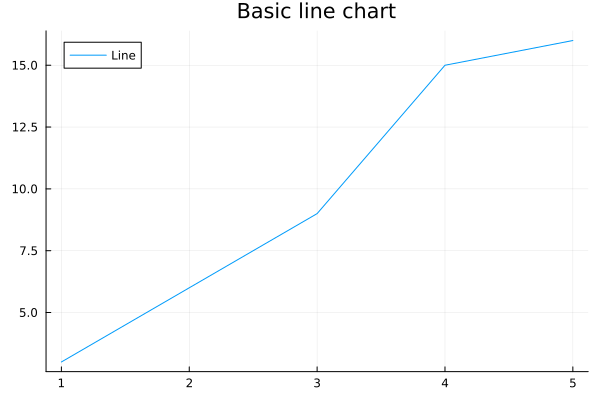

In [33]:
plot([1,2,3,4,5],[3,6,9,15,16],title="Basic line chart",label="Line")

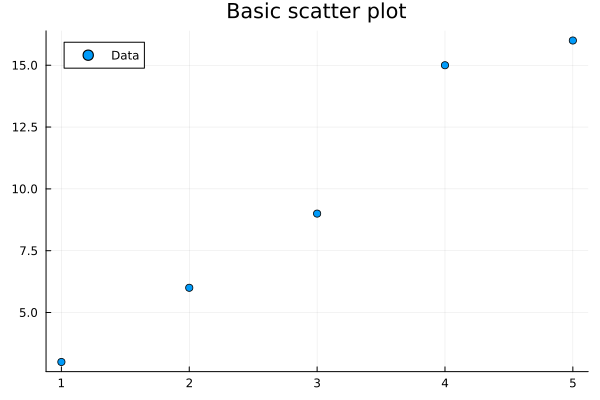

In [34]:
plot([1,2,3,4,5],[3,6,9,15,16],title="Basic scatter plot",label="Data",seriestype="scatter")

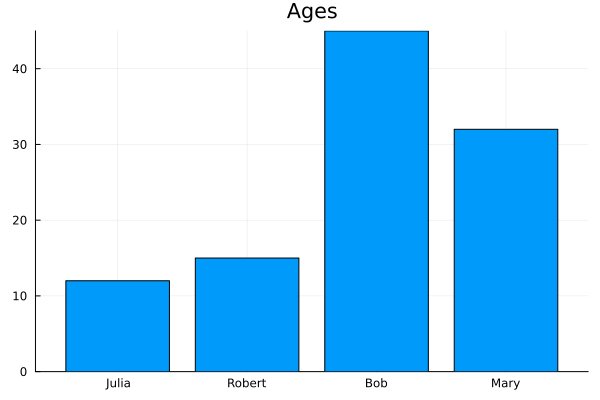

In [35]:
plot(df.name,df.age,title="Ages",label=nothing,seriestype="bar")

In [43]:
# Add packages
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")

# Import modules
using DataFrames, CSV

# Load training data to data frame
train_df = CSV.read("train.csv", DataFrame)

   Resolving package versions...
  No Changes to `C:\Users\maxim\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\maxim\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\maxim\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\maxim\.julia\environments\v1.10\Manifest.toml`


Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [44]:
describe(train_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


In [45]:
train_df = dropmissing(train_df,"Embarked")

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [46]:
train_df.Age = replace(train_df.Age,missing=>28)

889-element Vector{Float64}:
 22.0
 38.0
 26.0
 35.0
 35.0
 28.0
 54.0
  2.0
 27.0
 14.0
  4.0
 58.0
 20.0
  ⋮
 56.0
 25.0
 33.0
 22.0
 28.0
 25.0
 39.0
 27.0
 19.0
 28.0
 26.0
 32.0

In [47]:
train_df = select(train_df, Not("Cabin"))

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,Int64,Int64,Int64,String,String7,Float64,Int64,Int64,String31,Float64,String1
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S
6,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


In [48]:
train_df = select(train_df,Not(["PassengerId","Name"]));

In [49]:
combine(groupby(train_df,"Embarked"),nrow=>"count")

Row,Embarked,count
,String1,Int64
1,S,644
2,C,168
3,Q,77


In [50]:
train_df.Embarked = Int64.(replace(train_df.Embarked, "S" => 1, "C" => 2, "Q" => 3))

889-element Vector{Int64}:
 1
 2
 1
 1
 1
 3
 1
 1
 1
 2
 1
 1
 1
 ⋮
 2
 1
 1
 1
 1
 1
 3
 1
 1
 1
 2
 3

In [51]:
combine(groupby(train_df,"Sex"),nrow=>"count")

Row,Sex,count
,String7,Int64
1,male,577
2,female,312


In [52]:
train_df.Sex = Int64.(replace(train_df.Sex, "female" => 1, "male" => 2))

889-element Vector{Int64}:
 2
 1
 1
 1
 2
 2
 2
 2
 1
 1
 1
 1
 2
 ⋮
 1
 1
 2
 1
 2
 2
 1
 2
 1
 1
 2
 2

In [53]:
combine(groupby(train_df,"Ticket"),nrow=>"count")

Row,Ticket,count
,String31,Int64
1,A/5 21171,1
2,PC 17599,1
3,STON/O2. 3101282,1
4,113803,2
5,373450,1
6,330877,1
7,17463,1
8,349909,4
9,347742,3


In [54]:
train_df = select(train_df,Not("Ticket"))

Row,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,Int64,Int64,Int64,Float64,Int64,Int64,Float64,Int64
1,0,3,2,22.0,1,0,7.25,1
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.925,1
4,1,1,1,35.0,1,0,53.1,1
5,0,3,2,35.0,0,0,8.05,1
6,0,3,2,28.0,0,0,8.4583,3
7,0,1,2,54.0,0,0,51.8625,1
8,0,3,2,2.0,3,1,21.075,1
9,1,3,1,27.0,0,2,11.1333,1


In [55]:
describe(train_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Survived,0.382452,0,0.0,1,0,Int64
2,Pclass,2.31159,1,3.0,3,0,Int64
3,Sex,1.64904,1,2.0,2,0,Int64
4,Age,29.3152,0.42,28.0,80.0,0,Float64
5,SibSp,0.524184,0,0.0,8,0,Int64
6,Parch,0.382452,0,0.0,6,0,Int64
7,Fare,32.0967,0.0,14.4542,512.329,0,Float64
8,Embarked,1.3622,1,1.0,3,0,Int64


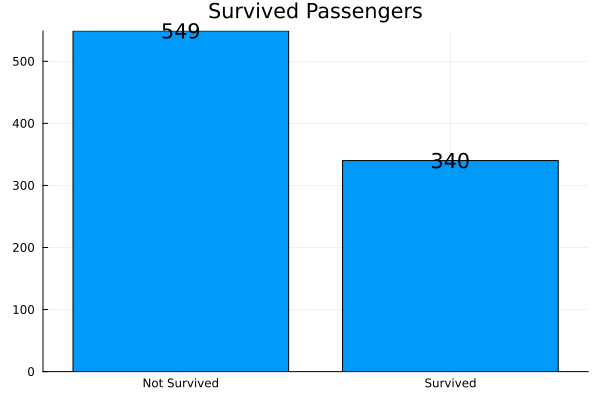

In [56]:
using Plots

# Group dataset by "Survived" column
survived = combine(groupby(train_df,"Survived"), nrow => "Count")

# Display the data on bar chart
plot(survived.Survived, survived.Count, title="Survived Passengers", label=nothing, seriestype="bar", texts=survived.Count)

# Modify X axis to display text labels instead of numbers
xticks!([0:1:1;],["Not Survived","Survived"])

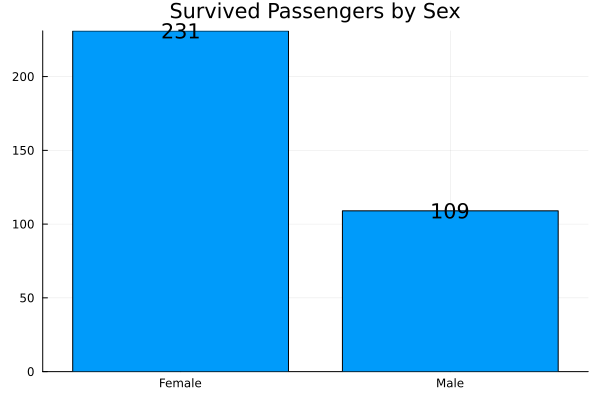

In [57]:
# Group dataset by Sex column and show only rows where Survived=1
survived_by_sex = combine(groupby(train_df[train_df.Survived .== 1,:],"Sex"), nrow => "Count")

# Display the data on bar chart 
plot(survived_by_sex.Sex, survived_by_sex.Count, title="Survived Passengers by Sex", label=nothing, seriestype="bar", texts=survived_by_sex.Count)

# Modify X axis to display text labels instead of numbers
xticks!([1:1:2;],["Female","Male"])

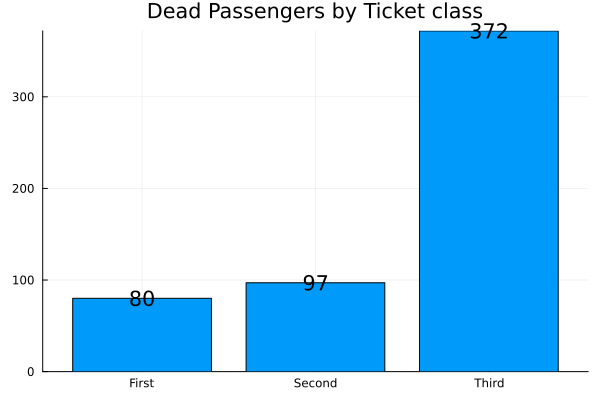

In [58]:
# Group dataset by PClass column and show only rows where Survived=0
death_by_pclass = combine(groupby(train_df[train_df.Survived .== 0,:],"Pclass"), nrow => "Count")

# Display the data on bar chart 
plot(death_by_pclass.Pclass, death_by_pclass.Count, title="Dead Passengers by Ticket class", label=nothing, 
    seriestype="bar", texts=death_by_pclass.Count)

# Modify X axis to display text labels instead of numbers
xticks!([1:1:3;],["First","Second","Third"])

In [59]:
train_df

Row,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,Int64,Int64,Int64,Float64,Int64,Int64,Float64,Int64
1,0,3,2,22.0,1,0,7.25,1
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.925,1
4,1,1,1,35.0,1,0,53.1,1
5,0,3,2,35.0,0,0,8.05,1
6,0,3,2,28.0,0,0,8.4583,3
7,0,1,2,54.0,0,0,51.8625,1
8,0,3,2,2.0,3,1,21.075,1
9,1,3,1,27.0,0,2,11.1333,1


In [95]:
Pkg.add("DecisionTree")
Pkg.add("ScikitLearn")
using DecisionTree, ScikitLearn.CrossValidation

   Resolving package versions...
  No Changes to `C:\Users\maxim\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\maxim\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\maxim\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\maxim\.julia\environments\v1.10\Manifest.toml`
[ Info: Precompiling ScikitLearn [3646fa90-6ef7-5e7e-9f22-8aca16db6324]


In [96]:
# Put "Survived" column to labels vector
y = train_df[:,"Survived"]
# Put all other columns to features matrix (important to convert to "Matrix" data type)
X = Matrix(train_df[:,Not(["Survived"])])

# Create Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_trees=100)

# Train the model, using features matrix and labels vector
fit!(model,X,y)

# Evaluate the accuracy of predictions using Cross Validation
accuracy = minimum(cross_val_score(model, X, y, cv=5))

0.7696629213483146

In [97]:
test_df = CSV.read("test.csv",DataFrame)
describe(test_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,1100.5,892,1100.5,1309,0,Int64
2,Pclass,2.26555,1,3.0,3,0,Int64
3,Name,,"Abbott, Master. Eugene Joseph",,"van Billiard, Master. Walter John",0,String
4,Sex,,female,,male,0,String7
5,Age,30.2726,0.17,27.0,76.0,86,"Union{Missing, Float64}"
6,SibSp,0.447368,0,0.0,8,0,Int64
7,Parch,0.392344,0,0.0,9,0,Int64
8,Ticket,,110469,,W.E.P. 5734,0,String31
9,Fare,35.6272,0.0,14.4542,512.329,1,"Union{Missing, Float64}"


In [98]:
PassengerId = test_df[:,"PassengerId"]

418-element Vector{Int64}:
  892
  893
  894
  895
  896
  897
  898
  899
  900
  901
  902
  903
  904
    ⋮
 1298
 1299
 1300
 1301
 1302
 1303
 1304
 1305
 1306
 1307
 1308
 1309

In [101]:
# Repeat the same transformations as we did for training dataset
test_df = select(test_df,Not(["PassengerId","Name","Ticket","Cabin"]))
test_df.Age = replace(test_df.Age,missing=>28)
test_df.Embarked = replace(test_df.Embarked,"S" => 1, "C" => 2, "Q" => 3)
test_df.Embarked = convert.(Int64,test_df.Embarked)
test_df.Sex = replace(test_df.Sex,"female" => 1,"male" => 2)
test_df.Sex = convert.(Int64,test_df.Sex)

# In addition, replace missing value in 'Fare' field with median
test_df.Fare = replace(test_df.Fare,missing=>14.4542)

418-element Vector{Float64}:
   7.8292
   7.0
   9.6875
   8.6625
  12.2875
   9.225
   7.6292
  29.0
   7.2292
  24.15
   7.8958
  26.0
  82.2667
   ⋮
  10.5
 211.5
   7.7208
  13.775
   7.75
  90.0
   7.775
   8.05
 108.9
   7.25
   8.05
  22.3583

In [102]:
Survived = predict(model, Matrix(test_df)) 

418-element Vector{Int64}:
 0
 0
 0
 1
 0
 0
 0
 0
 1
 0
 0
 0
 1
 ⋮
 0
 0
 1
 1
 1
 1
 0
 0
 1
 0
 0
 0

In [103]:
submit_df = DataFrame(PassengerId=PassengerId,Survived=Survived)
CSV.write("submission.csv",submit_df)

"submission.csv"

In [104]:
Pkg.add("JLD2")
using JLD2

   Resolving package versions...
   Installed FileIO ─ v1.16.3
   Installed JLD2 ─── v0.4.51
    Updating `C:\Users\maxim\.julia\environments\v1.10\Project.toml`
  [033835bb] + JLD2 v0.4.51
    Updating `C:\Users\maxim\.julia\environments\v1.10\Manifest.toml`
  [5789e2e9] + FileIO v1.16.3
  [033835bb] + JLD2 v0.4.51
Precompiling project...
  ✓ FileIO
  ✓ JLD2
  ✓ Plots → FileIOExt
  3 dependencies successfully precompiled in 56 seconds. 193 already precompiled.
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]


In [105]:
save_object("titanic.jld2", model)

In [106]:
using JLD2, DecisionTree
model = load_object("titanic2.jld2")
survived = predict(model,[1 2 35 0 2 144.5 1])
println(survived)

┌ Warning: Opening file with JLD2.MmapIO failed, falling back to IOStream
└ @ JLD2 C:\Users\maxim\.julia\packages\JLD2\bfPAo\src\JLD2.jl:171


LoadError: SystemError: opening file "titanic2.jld2": No such file or directory

In [107]:
using JLD2, DecisionTree

# Returns 1 if a passenger with
# specified 'data' survived or 0 if not
function isSurvived(data)
	model = load_object("titanic2.jld2")
	survived = predict(model,data)
	return survived[1]
end

isSurvived (generic function with 1 method)

In [108]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic</title>
</head>
<body>
    <table>
        <tbody>
            <tr>
                <td>Ticket class</td>
                <td>
                    <select id="pclass">
                        <option value="1">1</option>
                        <option value="2">2</option>
                        <option value="3">3</option>
                    </select>
                </td>
            </tr>
            <tr>
                <td>Sex</td>
                <td>
                    <select id="sex">
                        <option value="1">Female</option>                        
                        <option value="2">Male</option>
                    </select>
                </td>
            </tr>
            <tr>
                <td>Age</td>
                <td>
                    <input id="age" type="number"/>
                </td>
            </tr>
            <tr>
                <td># of Siblings/Spouces</td>
                <td>
                    <input id="sibsp" type="number"/>
                </td>
            </tr>
            <tr>
                <td># of Parents/children</td>
                <td>
                    <input id="parch" type="number"/>
                </td>
            </tr>
            <tr>
                <td>Fare</td>
                <td>
                    <input id="fare"/>
                </td>
            </tr>
            <tr>
                <td>Embarked</td>
                <td>
                    <select id="embarked">
                        <option value="1">S</option>
                        <option value="2">C</option>
                        <option value="3">Q</option>
                    </select>
                </td>
            </tr>
            <tr>
                <td>Survived</td>
                <td id="survived"></td>
            </tr>
            <tr>
                <td colspan="2">
                    <div>
                        <button id="submit" type="button">PREDICT</button>
                    </div>
                </td>
            </tr>
        </tbody>
    </table>
    <script>
        document.getElementById("survived").innerHTML = "";
        document.getElementById("submit").addEventListener("click",async() => {
            response = await fetch("http://localhost:8080",{
                method:"POST",
                body: JSON.stringify({
                    "pclass":parseInt(document.getElementById("pclass").value),
                    "sex":parseInt(document.getElementById("sex").value),
                    "age":parseFloat(document.getElementById("age").value),
                    "sibsp":parseInt(document.getElementById("sibsp").value),
                    "parch":parseInt(document.getElementById("parch").value),
                    "fare":parseFloat(document.getElementById("fare").value),
                    "embarked":parseInt(document.getElementById("embarked").value),
                })
            });
            const survivedCode =  parseInt(await response.text());
            document.getElementById("survived").innerHTML = survivedCode ? "YES" : "NO"
        })
    </script>
    <style>
        input,select {
            width:100%;
        }
        td {
            padding:5px;
        }
        td > div {
            text-align: center;
        }
        #survived {
            font-weight: bold;
            color:green;
        }
    </style>
</body>
</html>

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://C:/Users/maxim/In[108]#1:1\[90mIn[108]:1:1[0;0m]8;;\
[48;2;120;70;70m<[0;0m!DOCTYPE html>
[90m╙ ── [0;0m[91mnot a unary operator[0;0m